In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import mbuild as mb
import parmed
import torch_geometric as tg
from torch_geometric.loader import DataLoader
import shutil
import rdkit 
import torch
from torch import nn, optim

import sys
sys.path.append("/raid6/homes/kierannp/projects/megnn")
from megnn.datasets import *
from megnn.models import *
from megnn.utils import *

# try:
#     shutil.rmtree('./processed')
# except:
#     pass

2023-07-24 16:31:49.082920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 16:31:49.997968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/mpi/gcc/openmpi-4.1.2/lib64:/usr/local/mpi/gcc/openmpi-4.1.2/lib:/usr/local/mpi/gcc/openmpi-4.1.2/lib64
2023-07-24 16:31:49.998067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/mpi/

In [11]:
data_path = '~/projects/iMoDELS-supplements/data/raw-data/everything.csv'
descriptor_path = '/raid6/homes/kierannp/projects/iMoDELS-supplements/data/raw-data/descriptors-ind.csv'
des_data = pd.read_csv('/raid6/homes/kierannp/projects/iMoDELS-supplements/data/raw-data/descriptors-ind.csv').T
des_data = des_data.drop(['hdonors', 'hacceptors'],axis=1, inplace=False)
des_data = des_data.reset_index()

In [15]:
des_data[des_data['index'] == 'N'].drop(['index'], axis=1).values.shape

(1, 54)

In [7]:
s = "terminal_group_1,terminal_group_2,terminal_group_3,backbone,frac-1,frac-2,COF,MR-mean,MR-min,asphericity-mean,asphericity-min,balabanj-mean,balabanj-min,bertzct-mean,bertzct-min,chainlength,chi0-mean,chi0-min,chi0n-mean,chi0n-min,chi0v-mean,chi0v-min,chi1-mean,chi1-min,chi1n-mean,chi1n-min,chi1v-mean,chi1v-min,chi2n-mean,chi2n-min,chi2v-mean,chi2v-min,chi3n-mean,chi3n-min,chi3v-mean,chi3v-min,chi4n-mean,chi4n-min,chi4v-mean,chi4v-min,e-valence-mean,e-valence-min,eccentricity-mean,eccentricity-min,hbonds,hk-alpha-mean,hk-alpha-min,hk-kappa1-mean,hk-kappa1-min,hk-kappa2-mean,hk-kappa2-min,hk-kappa3-mean,hk-kappa3-min,intercept,ipc-mean,ipc-min,isf-mean,isf-min,labuteASA-mean,labuteASA-min,logP-mean,logP-min,molwt-hvy-mean,molwt-hvy-min,molwt-mean,molwt-min,nheavy-mean,nheavy-min,npr1-mean,npr1-min,npr2-mean,npr2-min,pbf-mean,pbf-min,pmi1-mean,pmi1-min,pmi2-mean,pmi2-min,pmi3-mean,pmi3-min,rbonds-mean,rbonds-min,rg-mean,rg-min,rpc+-mean,rpc+-min,rpc--mean,rpc--min,spherocity-mean,spherocity-min,tpsa-mean,tpsa-min,vsa+-mean,vsa+-min,vsa--mean,vsa--min,vsa-fhyd-mean,vsa-fhyd-min,vsa-fneg-mean,vsa-fneg-min,vsa-fpneg-mean,vsa-fpneg-min,vsa-fpos-mean,vsa-fpos-min,vsa-fppos-mean,vsa-fppos-min,vsa-hyd-mean,vsa-hyd-min,vsa-polar+-mean,vsa-polar+-min,vsa-polar--mean,vsa-polar--min,vsa-polar-mean,vsa-polar-min,COF-std,intercept-std"
len(s.split(','))

116

In [22]:
data_path = '~/projects/iMoDELS-supplements/data/raw-data/everything.csv'
dataframe = pd.read_csv(data_path, index_col=0)
print(dataframe.columns)
dataframe['frac-1']

Index(['terminal_group_1', 'terminal_group_2', 'terminal_group_3', 'backbone',
       'frac-1', 'frac-2', 'COF', 'MR-mean', 'MR-min', 'asphericity-mean',
       ...
       'vsa-hyd-mean', 'vsa-hyd-min', 'vsa-polar+-mean', 'vsa-polar+-min',
       'vsa-polar--mean', 'vsa-polar--min', 'vsa-polar-mean', 'vsa-polar-min',
       'COF-std', 'intercept-std'],
      dtype='object', length=116)


0       0.50
1       0.50
2       0.50
3       0.50
4       0.50
        ... 
9767    0.25
9768    0.25
9769    0.25
9770    0.25
9771    0.25
Name: frac-1, Length: 9772, dtype: float64

Processing...



0 loaded!

unable to load 
FC12CN3CC1OCC23 
COC1C(F)C1(N)CN

unable to load 
FC12COC1C3CC2N3 
COC=C(F)CN1CC1

unable to load 
O=C1C2CCC3C(N2)C13 
C1C2NC3=NC1C4C2C34


1000 loaded!

unable to load 
CC(=C)C12CC(CO1)C2 
O=C1NC2C3CN(C3)C12

unable to load 
C=CC=C1CC(=O)C=C1 
CC12CC3COC1C3N2

unable to load 
NC12CC3CNC1C3C2 
CC1NCC1CNC=N


2000 loaded!

unable to load 
CC1CC(=O)C(C)C1O 
C1C2NC3C1C4OC3C24

unable to load 
C1C2OC3C=C1C4C2C34 
CCC(=C)C=CNC=N

unable to load 
CC=C(F)C(N)=CC#N 
OC1C2CC3CCC2C13

unable to load 
C=C1CCNCC1C#N 
O=C1C2NC3CNC2C13


3000 loaded!

unable to load 
C=C1CC2C3CC2C1C3 
CC1CCCNCCN1

unable to load 
CC1CC2C3CN(C3)C12 
CCn1[nH]c(=O)[nH]c1=N

unable to load 
CC(C)(F)C#CC=NN 
NC1C2NC1C3CCC23

unable to load 
C1C2NC3C1C4CC3C24 
COC1(C)CC(=C)C=C1

unable to load 
CC1C2OC3COC2C13 
COC(C)C#CCCO


4000 loaded!

unable to load 
OC1C2CNC3C1OC23 
CC1=NNCC(=O)NO1



Done!


MEGNN(
  (embedding): Linear(in_features=5, out_features=64, bias=True)
  (gcl_0_0): E_GCL_mask(
    (edge_mlp): Sequential(
      (0): Linear(in_features=129, out_features=64, bias=True)
      (1): SiLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): SiLU()
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): SiLU()
    )
    (node_mlp): Sequential(
      (0): Linear(in_features=133, out_features=64, bias=True)
      (1): SiLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): SiLU()
      (4): Linear(in_features=64, out_features=64, bias=True)
    )
    (act_fn): SiLU()
  )
  (gcl_0_1): E_GCL_mask(
    (edge_mlp): Sequential(
      (0): Linear(in_features=129, out_features=64, bias=True)
      (1): SiLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): SiLU()
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): SiLU()
    )
    (node_mlp): Sequential(
      (0): Linear(

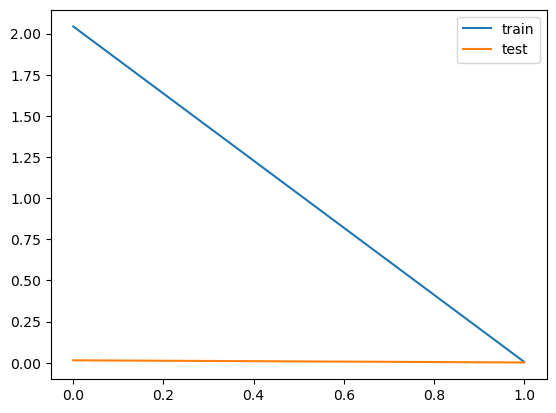

In [4]:
%run run_simple.py

In [9]:
model.eval()
epoch_loss = 0
total_samples = 0
for data in test_loader:  # Iterate in batches over the training/test dataset.
    conversion = convert_to_dense(data, device, dtype)

    one_hot_s = conversion[0]
    one_hot_t = conversion[1]
    edges_s = conversion[2]
    edges_t = conversion[3]
    atom_mask_s = conversion[4]
    atom_mask_t = conversion[5]
    edge_mask_s = conversion[6]
    edge_mask_t = conversion[7]
    n_nodes_s = conversion[8]
    n_nodes_t = conversion[9]
    atom_positions_s = conversion[10]
    atom_positions_t = conversion[11]
    batch_size_s = conversion[12]
    label = conversion[13]

    pred = model(
        h0 = [one_hot_s, one_hot_t], 
        all_edges = [edges_s, edges_t], 
        all_edge_attr = [None, None], 
        node_masks = [atom_mask_s, atom_mask_t], 
        edge_masks = [edge_mask_s, edge_mask_t],
        n_nodes = [n_nodes_s, n_nodes_t], 
        x = [atom_positions_s, atom_positions_t]
    )

    # epoch_loss += criterion(pred, (label - prop_mean) / prop_mad).item()*batch_size
    epoch_loss += criterion(pred, label).item()
    total_samples += batch_size_s


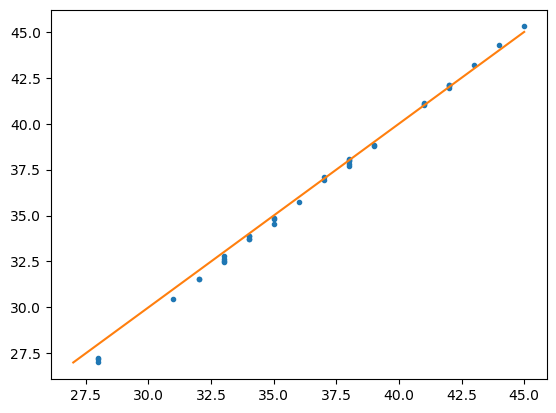

In [16]:
plt.plot(label.detach().numpy(), pred.detach().numpy(), '.')
plt.plot(list(range(27,46)), list(range(27,46)))

In [9]:
from torchviz import make_dot
import torch_geometric as tg

dat = PdbBind_Dataset(root='.')
dtype = torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MEGNN(n_graphs=2, in_node_nf=dat.data.x_s.size(1), in_edge_nf=0, hidden_nf=32, device=device, n_layers=3, coords_weight=1.0,
             attention=True, node_attr=1)
model.load_state_dict(torch.load('models/model.pth', map_location=device))

dat = PdbBind_Dataset(root='.')
loader = DataLoader(dat, batch_size=1, follow_batch=['x_s', 'x_t', 'positions_s', 'positions_t'], shuffle=True)
for data in loader:
    dense_positions_s, atom_mask_s = tg.utils.to_dense_batch(data.positions_s, data.positions_s_batch)
    dense_positions_t, atom_mask_t = tg.utils.to_dense_batch(data.positions_t, data.positions_t_batch)
    batch_size_s, n_nodes_s, _ = dense_positions_s.size()
    batch_size_t, n_nodes_t, _ = dense_positions_t.size()
    atom_positions_s = dense_positions_s.view(batch_size_s * n_nodes_s, -1).to(device, dtype)
    atom_positions_t = dense_positions_t.view(batch_size_t * n_nodes_t, -1).to(device, dtype)
    edge_mask_s = atom_mask_s.unsqueeze(1) * atom_mask_s.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_s.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_s *= diag_mask
    edge_mask_s = edge_mask_s.view(batch_size_s * n_nodes_s * n_nodes_s, 1).to(device)
    edge_mask_t = atom_mask_t.unsqueeze(1) * atom_mask_t.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_t.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_t *= diag_mask
    edge_mask_t = edge_mask_t.view(batch_size_t * n_nodes_t * n_nodes_t, 1).to(device)
    atom_mask_s = atom_mask_s.view(batch_size_s * n_nodes_s, -1).to(device)
    atom_mask_t = atom_mask_t.view(batch_size_t * n_nodes_t, -1).to(device)
    one_hot_s, one_hot_s_mask = tg.utils.to_dense_batch(data.x_s, data.x_s_batch)
    one_hot_t, one_hot_s_mask = tg.utils.to_dense_batch(data.x_t, data.x_t_batch)
    one_hot_s = one_hot_s.view(batch_size_s * n_nodes_s, -1).to(device)
    one_hot_t = one_hot_t.view(batch_size_t * n_nodes_t, -1).to(device)
    edges_s = get_adj_matrix(n_nodes_s, batch_size_s, device)
    edges_t = get_adj_matrix(n_nodes_t, batch_size_t, device)
    label = data.y.to(device, dtype)
    pred = model(h0=[one_hot_s, one_hot_t], x=[atom_positions_s, atom_positions_t], all_edges=[edges_s, edges_t],
                all_edge_attr=[None, None], node_masks=[atom_mask_s, atom_mask_t],
                edge_masks=[edge_mask_s, edge_mask_t], n_nodes=[n_nodes_s, n_nodes_t])
    break
make_dot(pred.mean(), params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

/raid6/homes/kierannp/.conda/envs/ml/lib/python3.10/site-packages/torchviz/dot.py:65: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.9") and \
/raid6/homes/kierannp/.conda/envs/ml/lib/python3.10/site-packages/torchviz/dot.py:65: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.9") and \


'rnn_torchviz.png'

In [2]:
dat = PdbBind_Dataset(root='.')
dtype = torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MEGNN(n_graphs=2, in_node_nf=dat.data.x_s.size(1), in_edge_nf=0, hidden_nf=32, device=device, n_layers=3, coords_weight=1.0,
             attention=True, node_attr=1)
model.load_state_dict(torch.load('models/model.pth', map_location=device))

dat = PdbBind_Dataset(root='.')
loader = DataLoader(dat, batch_size=1, follow_batch=['x_s', 'x_t', 'positions_s', 'positions_t'], shuffle=True)

predictions = []
actuals = []
for data in loader:
    dense_positions_s, atom_mask_s = tg.utils.to_dense_batch(data.positions_s, data.positions_s_batch)
    dense_positions_t, atom_mask_t = tg.utils.to_dense_batch(data.positions_t, data.positions_t_batch)
    batch_size_s, n_nodes_s, _ = dense_positions_s.size()
    batch_size_t, n_nodes_t, _ = dense_positions_t.size()
    atom_positions_s = dense_positions_s.view(batch_size_s * n_nodes_s, -1).to(device, dtype)
    atom_positions_t = dense_positions_t.view(batch_size_t * n_nodes_t, -1).to(device, dtype)
    edge_mask_s = atom_mask_s.unsqueeze(1) * atom_mask_s.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_s.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_s *= diag_mask
    edge_mask_s = edge_mask_s.view(batch_size_s * n_nodes_s * n_nodes_s, 1).to(device)
    edge_mask_t = atom_mask_t.unsqueeze(1) * atom_mask_t.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_t.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_t *= diag_mask
    edge_mask_t = edge_mask_t.view(batch_size_t * n_nodes_t * n_nodes_t, 1).to(device)
    atom_mask_s = atom_mask_s.view(batch_size_s * n_nodes_s, -1).to(device)
    atom_mask_t = atom_mask_t.view(batch_size_t * n_nodes_t, -1).to(device)
    one_hot_s, one_hot_s_mask = tg.utils.to_dense_batch(data.x_s, data.x_s_batch)
    one_hot_t, one_hot_s_mask = tg.utils.to_dense_batch(data.x_t, data.x_t_batch)
    one_hot_s = one_hot_s.view(batch_size_s * n_nodes_s, -1).to(device)
    one_hot_t = one_hot_t.view(batch_size_t * n_nodes_t, -1).to(device)
    edges_s = get_adj_matrix(n_nodes_s, batch_size_s, device)
    edges_t = get_adj_matrix(n_nodes_t, batch_size_t, device)
    label = data.y.to(device, dtype)
    pred = model(h0=[one_hot_s, one_hot_t], x=[atom_positions_s, atom_positions_t], all_edges=[edges_s, edges_t],
                all_edge_attr=[None, None], node_masks=[atom_mask_s, atom_mask_t],
                edge_masks=[edge_mask_s, edge_mask_t], n_nodes=[n_nodes_s, n_nodes_t])
    predictions.append(pred.item())
    actuals.append(label.item())
    

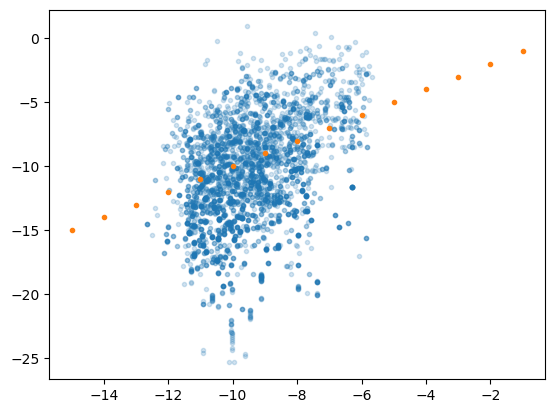

In [9]:
plt.plot(predictions, actuals, '.',alpha=.2)
plt.plot(np.arange(-15,0),np.arange(-15,0))

In [17]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

48519

In [15]:
device = torch.device("cpu")
dtype = torch.float32
df = pd.read_excel('./cloud_point.xlsx')
df = df.drop_duplicates().dropna()
dat = Cloud_Point_Dataset(root='.',dataframe=df)

batch_size = 16
loader = DataLoader(dat, batch_size=batch_size, follow_batch=['x_s', 'x_t', 'positions_s', 'positions_t'], shuffle=True)

model = MEGNN(n_graphs=2, in_node_nf=7, in_edge_nf=0, hidden_nf=64, device=device, n_layers=7, coords_weight=1.0,
             attention=True, node_attr=1, n_enviro=4)
model.load_state_dict(torch.load('model.pth'))
model = model.to(device)

In [9]:
model.eval()
preds = []
truths = []
for data in loader:  # Iterate in batches over the training dataset.
    dense_positions_s, atom_mask_s = tg.utils.to_dense_batch(data.positions_s, data.positions_s_batch)
    dense_positions_t, atom_mask_t = tg.utils.to_dense_batch(data.positions_t, data.positions_t_batch)
    batch_size_s, n_nodes_s, _ = dense_positions_s.size()
    batch_size_t, n_nodes_t, _ = dense_positions_t.size()
    atom_positions_s = dense_positions_s.view(batch_size_s * n_nodes_s, -1).to(device, dtype)
    atom_positions_t = dense_positions_t.view(batch_size_t * n_nodes_t, -1).to(device, dtype)
    edge_mask_s = atom_mask_s.unsqueeze(1) * atom_mask_s.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_s.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_s *= diag_mask
    edge_mask_s = edge_mask_s.view(batch_size_s * n_nodes_s * n_nodes_s, 1).to(device)
    edge_mask_t = atom_mask_t.unsqueeze(1) * atom_mask_t.unsqueeze(2)
    diag_mask = ~torch.eye(edge_mask_t.size(1), dtype=torch.bool).unsqueeze(0)
    edge_mask_t *= diag_mask
    edge_mask_t = edge_mask_t.view(batch_size_t * n_nodes_t * n_nodes_t, 1).to(device)
    atom_mask_s = atom_mask_s.view(batch_size_s * n_nodes_s, -1).to(device)
    atom_mask_t = atom_mask_t.view(batch_size_t * n_nodes_t, -1).to(device)
    one_hot_s, one_hot_s_mask = tg.utils.to_dense_batch(data.x_s, data.x_s_batch)
    one_hot_t, one_hot_s_mask = tg.utils.to_dense_batch(data.x_t, data.x_t_batch)
    one_hot_s = one_hot_s.view(batch_size_s * n_nodes_s, -1).to(device)
    one_hot_t = one_hot_t.view(batch_size_t * n_nodes_t, -1).to(device)
    edges_s = get_adj_matrix(n_nodes_s, batch_size_s, device)
    edges_t = get_adj_matrix(n_nodes_t, batch_size_t, device)
    enviro = data.enviro.to(device, dtype)
    label = data.y.to(device, dtype)
    
    pred = model(h0=[one_hot_s, one_hot_t], x=[atom_positions_s, atom_positions_t], all_edges=[edges_s, edges_t],
                        all_edge_attr=[None, None], node_masks=[atom_mask_s, atom_mask_t],
                        edge_masks=[edge_mask_s, edge_mask_t], n_nodes=[n_nodes_s, n_nodes_t], enviro = enviro)
    preds.extend(list(pred.detach()))
    truths.extend(list(label))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x4 and 7x64)

Text(0, 0.5, 'Predicted')

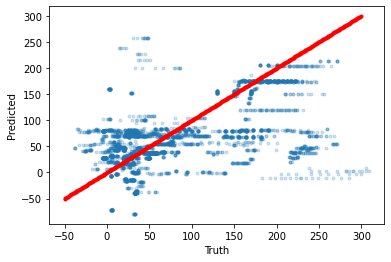

In [24]:
plt.plot(truths, preds,'.',alpha=.2)
plt.plot(list(range(-50,300)), list(range(-50,300)), 'r.')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
df = pd.read_excel('./cloud_point.xlsx')
df = df.drop_duplicates().dropna()
# fit the regressor with x and y data
regressor.fit(df[''], y)
